In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import spacy

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/OmkarPathak/Playing-with-datasets/master/Email%20Spam%20Filtering/emails.csv', nrows=5000)

In [3]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
data = df.copy()

In [5]:
data.iloc[0,0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [6]:
data['text'] = data['text'].apply(lambda x: x[8:])
data['text']

0        naturally irresistible your corporate identit...
1        the stock trading gunslinger  fanny is merril...
2        unbelievable new homes made easy  im wanting ...
3        4 color printing special  request additional ...
4        do not have money , get software cds from her...
                              ...                        
4995     re : mountaintop meetings next week  ravi ,  ...
4996     hedge effectiveness test for fair value hedge...
4997     your job application to enron research group ...
4998     1 / 2 day seminar : the new texas electric ma...
4999     transport fuel p / l  - - - - - - - - - - - -...
Name: text, Length: 5000, dtype: object

In [7]:
data['text'] = data['text'].apply(lambda x: x.lower())

In [8]:
data['text'] = data['text'].map(lambda x: re.sub(r'\W+', ' ' , x))

In [9]:
data['text'] = data['text'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

In [10]:
data['text'] = data['text'].apply(lambda x: ' '.join([i for i in x.split()]))

In [11]:
import spacy
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words
data['text'] = data['text'].apply(lambda x: ' '.join([i for i in x.split() if i not in stopwords]))

In [12]:
# lemmetization and stemming
data['text'] = data['text'].apply(lambda x: ' '.join([i.lemma_ for i in nlp(x)]))

In [13]:
data.iloc[2,0]

'unbelievable new home easy I m want homeowner pre approve home loan fix rate offer extend unconditionally credit way factor advantage limited time opportunity ask visit website complete minute post approval form look foward hearing dorca pittman'

In [14]:
X = data['text']
y = data['spam']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000,)
(1000,)
(4000,)
(1000,)


In [17]:
# # bag of words
# from sklearn.feature_extraction.text import CountVectorizer
# vec = CountVectorizer()
# vec.fit_transform(x_train)
# x_train_vec = vec.fit_transform(x_train)
# # cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=vec.get_feature_names())
# # print(cv_dataframe)

In [28]:
# tf-idf term frequency-inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features=5000)
x_train_vec = vec.fit_transform(x_train)

In [29]:
x_train_vec

<4000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 269933 stored elements in Compressed Sparse Row format>

In [30]:
x_train_vec.shape

(4000, 5000)

In [31]:
tfidf_data = pd.DataFrame(x_train_vec.toarray(), columns = vec.get_feature_names_out())

In [32]:
tfidf_data

,aa,aaa,ab,abacus,abhay,ability,able,abroad,absence,absolute,...,ze,zero,zhang,zhendong,zimin,zingale,zip,ziplip,zipter,zone
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.068593,0.0,0.0,0.023962,0.018106,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3996,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3997,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3998,0.0,0.0,0.000000,0.0,0.0,0.000000,0.031261,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


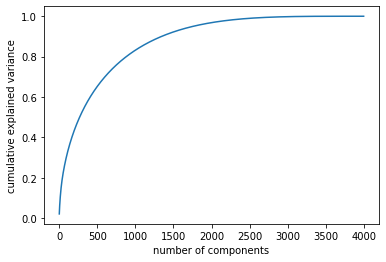

In [33]:
from sklearn.decomposition import PCA
pca = PCA().fit(tfidf_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [24]:
pca = PCA(n_components=500)
pca_data = pca.fit_transform(tfidf_data)

In [25]:
from sklearn .ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(pca_data, y_train)

RandomForestClassifier()

In [26]:
y_pred = model.predict(pca.transform(pd.DataFrame(vec.transform(x_test).toarray(), columns = vec.get_feature_names_out())))

In [27]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.951
